# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
df_raw = pd.read_csv('household_power_consumption.txt', sep=';')

/var/folders/4h/2mhykj8x06d0qslpc4btw7100000gn/T/ipykernel_45581/678221139.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('household_power_consumption.txt', sep=';')


In [4]:
print(df_raw.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [5]:
print(df_raw.describe())

       Sub_metering_3
count    2.049280e+06
mean     6.458447e+00
std      8.437154e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
print(df_raw.dtypes)

# Specify column data types when reading in the CSV file
dtypes = {
    'Date': 'str',
    'Time': 'str',
    'Global_active_power': 'float',
    'Global_reactive_power': 'float',
    'Voltage': 'float',
    'Global_intensity': 'float',
    'Sub_metering_1': 'float',
    'Sub_metering_2': 'float',
    'Sub_metering_3': 'float'
}


Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [8]:
#create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Check the first few rows and column data types
print(df.head())
print(df.dtypes)

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  \
0           18.400          0.000          1.000            17.0   
1           23.000          0.000          1.000            16.0   
2           23.000          0.000          2.000            17.0   
3           23.000          0.000          1.000            17.0   
4           15.800          0.000          1.000            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:00  
3 2006-12-16 17:27:00  
4 

In [9]:
# Convert remaining columns to numeric data types
df['Global_active_power'] = df['Global_active_power'].apply(pd.to_numeric, errors='coerce')
df['Global_reactive_power'] = df['Global_reactive_power'].apply(pd.to_numeric, errors='coerce')
df['Voltage'] = df['Voltage'].apply(pd.to_numeric, errors='coerce')
df['Global_intensity'] = df['Global_intensity'].apply(pd.to_numeric, errors='coerce')
df['Sub_metering_1'] = df['Sub_metering_1'].apply(pd.to_numeric, errors='coerce')
df['Sub_metering_2'] = df['Sub_metering_2'].apply(pd.to_numeric, errors='coerce')

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:0

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [11]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [12]:
print(df['Date'].iloc[0])

2006-12-16


In [13]:
print(df['Time'].iloc[0])

17:24:00


Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [14]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
print(desc)

      Global_active_power Global_reactive_power       Voltage  \
count        2049280.0000          2049280.0000  2049280.0000   
mean               1.0916                0.1237      240.8399   
min                0.0760                0.0000      223.2000   
25%                0.3080                0.0480      238.9900   
50%                0.6020                0.1000      241.0100   
75%                1.5280                0.1940      242.8900   
max               11.1220                1.3900      254.1500   
std                1.0573                0.1127        3.2400   

      Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  \
count     2049280.0000   2049280.0000   2049280.0000   2049280.0000   
mean            4.6278         1.1219         1.2985         6.4584   
min             0.2000         0.0000         0.0000         0.0000   
25%             1.4000         0.0000         0.0000         0.0000   
50%             2.6000         0.0000         0.0000       

Those row counts look a little funky. Let's visualize our missing data.

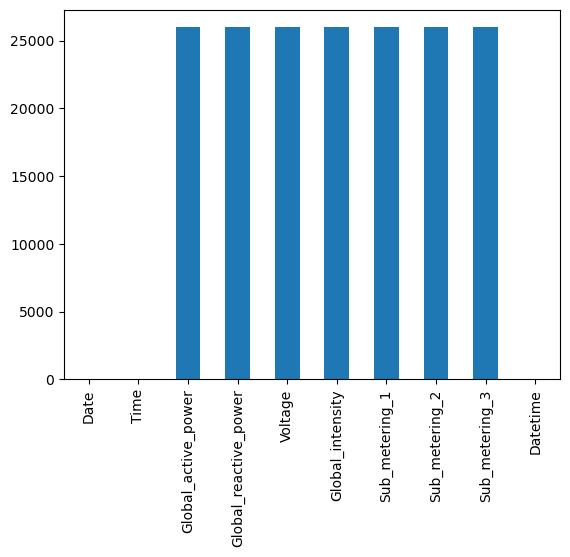

In [15]:
# Create a sample DataFrame with some missing data
df.isna().sum().plot.bar()
plt.show()

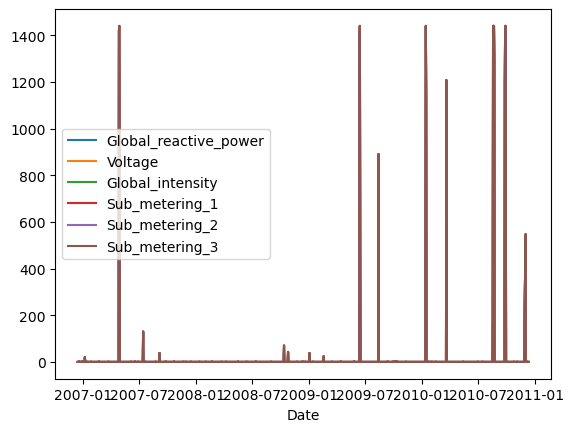

In [16]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])
plt.show()

**Q: What do you notice about the pattern of missing data?**

A: i noticed that it can affect the validity of your analysis and the conclusions drawn from it.Visualizing missing data patterns can help identify if there are any trends or patterns in the missing data that may require further  investigation. Depending on the analysis, you may consider different strategies for handling missing data, such as imputation, deletion, or modeling the missing data mechanism directly.Overall,analyzing and handling missing data is an important step in data analysis, and it requires careful consideration and planning.
**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A:According to me,choice of method to handle missing data depends on several factors, such as the nature and source of missingness, the type of analysis being conducted, and the size and complexity of the dataset.A Model-based methods: This method involves modeling the missing data mechanism directly, either as a separate analysis or as part of the primary analysis. It can be useful when the missing data is related to other variables in the dataset, and the missing data mechanism is complex or unknown. However, it can be computationally intensive and require more specialized expertise.A combination of multiple methods can be useful to compare and validate the results and mitigate the limitations



 

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [17]:
#clean up missing data here


In [18]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
print(desc)

      Global_active_power Global_reactive_power       Voltage  \
count        2049280.0000          2049280.0000  2049280.0000   
mean               1.0916                0.1237      240.8399   
min                0.0760                0.0000      223.2000   
25%                0.3080                0.0480      238.9900   
50%                0.6020                0.1000      241.0100   
75%                1.5280                0.1940      242.8900   
max               11.1220                1.3900      254.1500   
std                1.0573                0.1127        3.2400   

      Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  \
count     2049280.0000   2049280.0000   2049280.0000   2049280.0000   
mean            4.6278         1.1219         1.2985         6.4584   
min             0.2000         0.0000         0.0000         0.0000   
25%             1.4000         0.0000         0.0000         0.0000   
50%             2.6000         0.0000         0.0000       

## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I chose the following Four variables to visualize over time:

Global_active_power - This variable represents the total active power consumed by the household per minute. It is interesting to see how the power consumption changes over time, and whether there are any patterns or trends in the data.

Global_reactive_power - This variable represents the total reactive power consumed by the household per minute. Reactive power is used to maintain the voltage in the electrical grid and is not used by the household. It is interesting to see how reactive power varies over time and whether there are any patterns or trends in the data.

Voltage - This variable represents the voltage level of the electricity supply to the household. It is interesting to see how the voltage level varies over time and whether there are any patterns or trends in the data.

Sub_metering_1 - This variable represents the active energy consumed by the kitchen per minute. It is interesting to see how the energy consumption in the kitchen varies over time and whether there are any patterns or trends in the data.

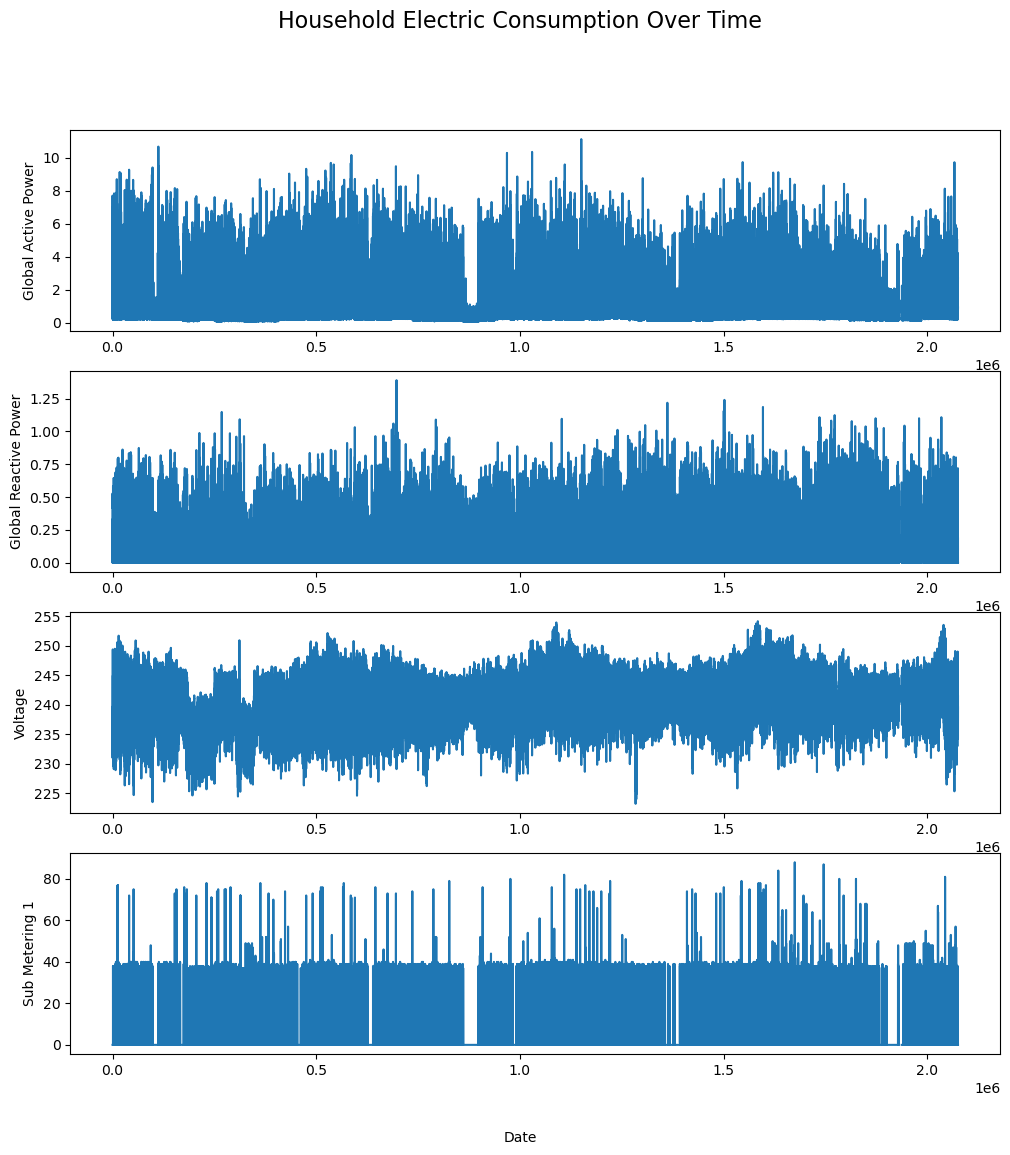

In [20]:
#build your line chart here

# Create separate line charts for each variable
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
df['Global_active_power'].plot(ax=axes[0])
axes[0].set_ylabel('Global Active Power')
df['Global_reactive_power'].plot(ax=axes[1])
axes[1].set_ylabel('Global Reactive Power')
df['Voltage'].plot(ax=axes[2])
axes[2].set_ylabel('Voltage')
df['Sub_metering_1'].plot(ax=axes[3])
axes[3].set_ylabel('Sub Metering 1')

# Set common x-axis label and title
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.suptitle('Household Electric Consumption Over Time', fontsize=16)

# Display the plot
plt.show()


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:Visualizing the raw data shows a lot of noise and variability, making it difficult to observe any clear patterns or trends. The fluctuations in the data may be due to daily or weekly cycles of energy use, but it is hard to tell from the raw plot. This plot is not very useful for drawing any meaningful insights or conclusions.

Additionally, the plot is difficult to read and interpret due to the large number of data points, which makes it hard to see any patterns or trends. In order to make the plot more readable and to highlight any potential patterns or trends, it may be necessary to aggregate the data over longer time periods (e.g. hourly or daily averages) or to use more sophisticated data visualization techniques.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [22]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
monthly_averages = df.groupby(pd.Grouper(key='Datetime', freq='M')).mean()

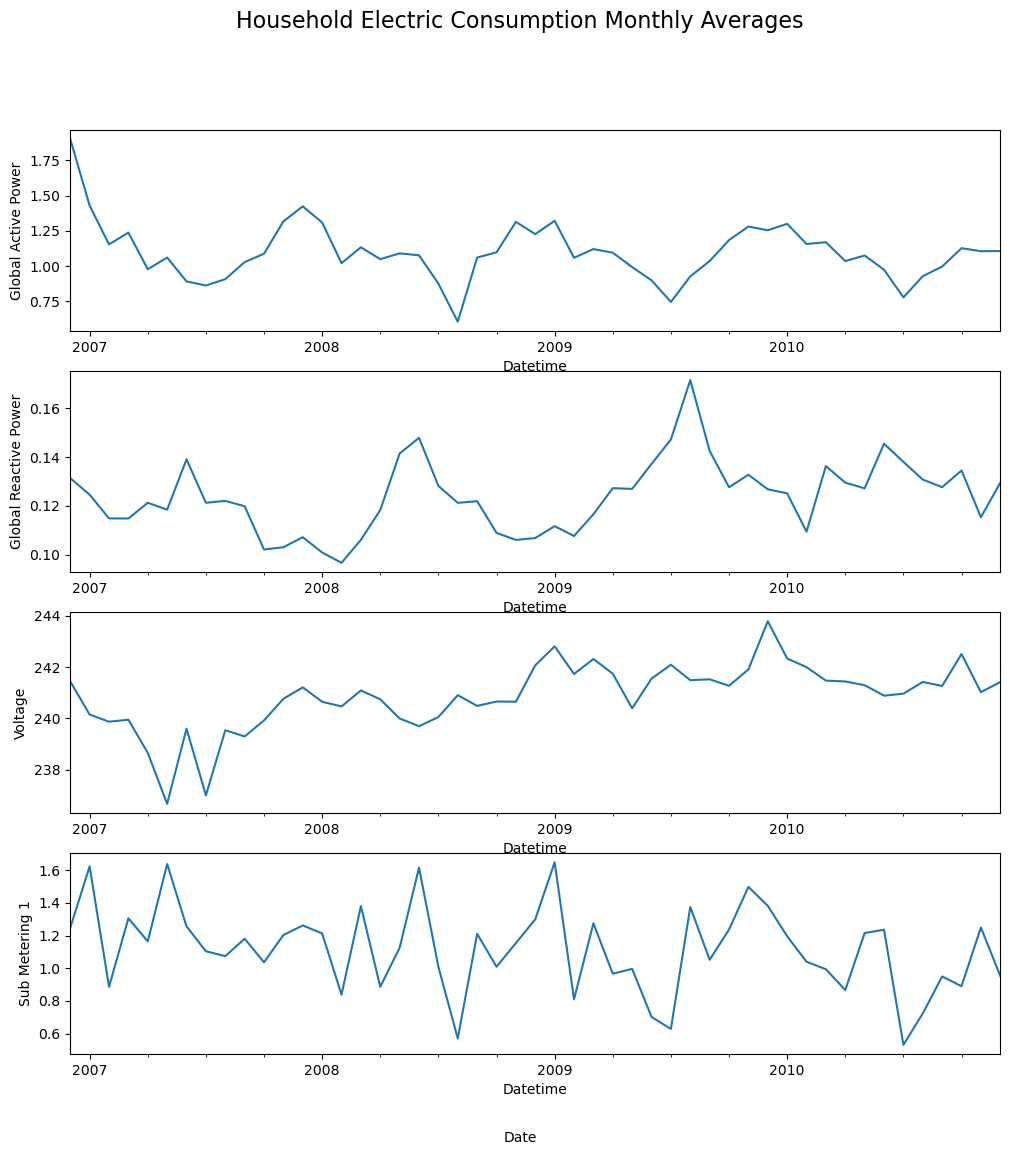

In [23]:
#build your linechart here
# Creating separate line charts for each variable
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
monthly_averages['Global_active_power'].plot(ax=axes[0])
axes[0].set_ylabel('Global Active Power')
monthly_averages['Global_reactive_power'].plot(ax=axes[1])
axes[1].set_ylabel('Global Reactive Power')
monthly_averages['Voltage'].plot(ax=axes[2])
axes[2].set_ylabel('Voltage')
monthly_averages['Sub_metering_1'].plot(ax=axes[3])
axes[3].set_ylabel('Sub Metering 1')

# Set common x-axis label and title
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.suptitle('Household Electric Consumption Monthly Averages', fontsize=16)

# Display the plot
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: Looking at the monthly data, we can see that the global active power, global reactive power, and sub metering 1 all seem to have a similar pattern, with peaks in usage during the winter months and lower usage during the summer months. The voltage, on the other hand, shows a more consistent level throughout the year.

Additionally, it looks like there is a general trend of decreasing power usage over time, which could be due to changes in household behavior, advancements in energy-efficient appliances, or other factors. Overall, the monthly data provides a more detailed look at the patterns of electric consumption over time, and can help to identify trends and potential areas for energy conservation.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [26]:
#compute your moving average here

# Compute 30-day moving averages
rolling_averages = df.rolling(window=30).mean()

/var/folders/4h/2mhykj8x06d0qslpc4btw7100000gn/T/ipykernel_45581/877858291.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date', 'Datetime', 'Time'], dtype='object')
  rolling_averages = df.rolling(window=30).mean()


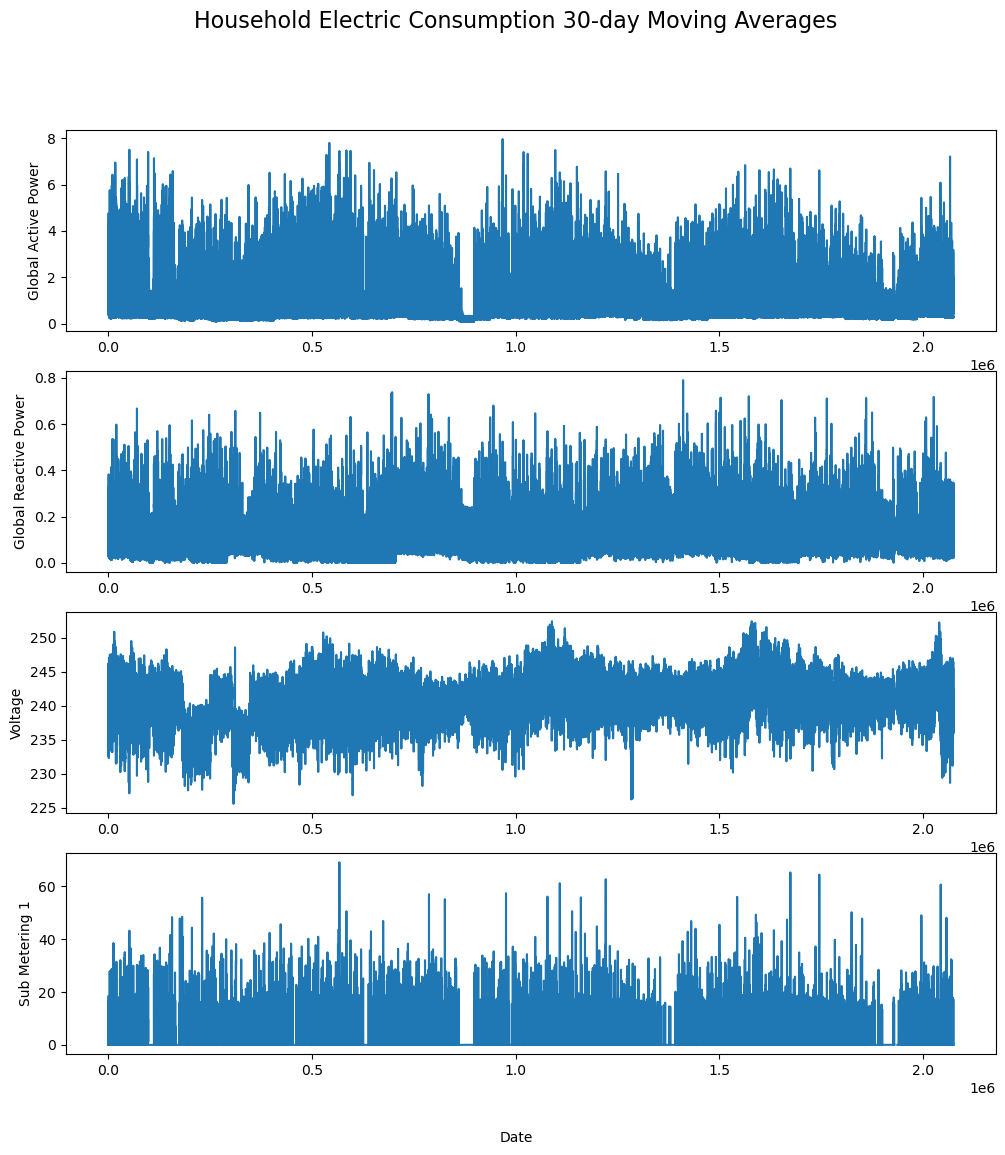

In [27]:
#build your line chart on the moving average here

# Create separate line charts for each variable
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
rolling_averages['Global_active_power'].plot(ax=axes[0])
axes[0].set_ylabel('Global Active Power')
rolling_averages['Global_reactive_power'].plot(ax=axes[1])
axes[1].set_ylabel('Global Reactive Power')
rolling_averages['Voltage'].plot(ax=axes[2])
axes[2].set_ylabel('Voltage')
rolling_averages['Sub_metering_1'].plot(ax=axes[3])
axes[3].set_ylabel('Sub Metering 1')

# Set common x-axis label and title
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.suptitle('Household Electric Consumption 30-day Moving Averages', fontsize=16)

# Display the plot
plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**
A: The moving average and monthly average are both useful ways to visualize the data, but they provide different types of insights.The monthly average provides a high-level overview of the data, showing how each variable changes over the course of each month, and allowing us to compare the usage patterns across different years. It is particularly useful for identifying seasonal trends and patterns that repeat over time.

On the other hand, the moving average provides a more detailed look at the data, smoothing out the short-term fluctuations and highlighting the longer-term trends in the data. It is particularly useful for identifying trends that might be obscured by the noise in the original data, and for detecting changes in the usage patterns over time.

Overall, both the monthly average and moving average can be effective ways to visualize the data, depending on the specific insights that we are trying to glean from the data. In general, if we are interested in identifying long-term trends and changes in the data, the moving average is likely to be more effective, while if we are interested in identifying seasonal patterns and cycles in the data, the monthly average is likely to be more effective.






## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

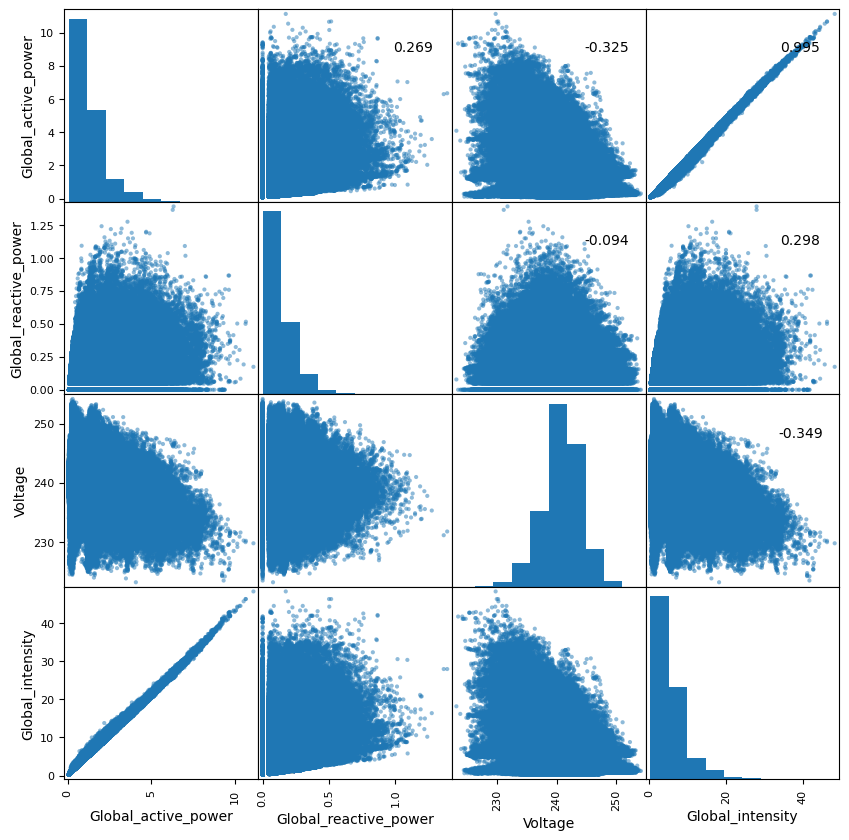

In [28]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: Looking at the scatter matrix plot and the correlation coefficients, we can see that the variables Global_active_power, Global_intensity, and Voltage are strongly positively correlated. This makes sense as they are all measures of the overall power consumption of the household. There is also a weaker positive correlation between Global_active_power and Global_reactive_power, which suggests that they may be measuring related but distinct aspects of the household's power consumption.
These patterns and correlations can have an effect on downstream tasks such as predictive modeling or anomaly detection. For example, if we are building a predictive model to forecast future power consumption, we may want to consider including all three of these variables as predictors due to their strong correlations. On the other hand, if we are trying to detect unusual power consumption patterns, we may want to focus on Global_active_power as it is the most strongly correlated variable with the other variables showing weaker correlations. In either case, understanding the patterns and correlations in the data is important for making informed decisions about downstream tasks.